This file demonstrates how the flexible functions work. Note that here the function has been changed so that $d_0/E_c n/\varepsilon^{-1/3}$ is now $d_0/E_c n^2/\varepsilon^{-1/3}$. This is to show how the perturbation can be different, though this exact change is just one example of how these functions could be used.

If the code in DynaMETE\_Rfunctions\_FlexibleFunctions.py is changed to return the $n^2$ dependence to $n$, we can show that $\lambda$ dynamics gives identical solutions. This plot has been saved as flex_functions_identical_n_dependence.pdf.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lambda_dynamics_FlexibleFunctions as ld
import DynaMETE_Rfunctions_FlexibleFunctions as rf
import lambda_dynamics as ldf # Fixed functions
%matplotlib inline

# Setting up
Note that we need a smaller sample size since this is much slower and BCI is huge. This numbers have been approximately scaled down from BCI using the actual site data, particularly the estimates for the state variables. Note that $d_0$ must be much smaller since we are now using $n^2$ instead of $n$ there.

In [2]:
# Set up state variables etc.

# state variables
s_d = np.array([30,10**3,2.04*10**4])
s_i = pd.Series(s_d, index=['S','N','E'])

# parameters, as BCI but edited Ec and mu. 
p_d = np.array([0.2,0.002,500,1.,0.42,2*10**4,0.02])
p_i = pd.Series(p_d,index=['b0','d0','m0','w0','w10','Ec','mu'])
# Optimize
p = ld.get_ss_params(s_i,p_i)
display(p)

b0         0.200000
d0         0.002000
m0       127.404893
w0         1.000000
w10        0.224972
Ec     20000.000000
mu         0.352521
dtype: float64

While most parameters here still make sense relative to the larger parameters, $\mu$ does not. In theory, $\mu$ should likely be smaller as the meta community pool is smaller, but it is larger here. Since this is mainly just to test to see how the functions behave with a different functional form, we have left this as is.

In [17]:
# perturb
perturb = p.copy()
perturb['d0'] = 5/4*p_i['d0'] # This is to keep the same order of magnitude of perturbation

In [31]:
perturb

b0         0.200000
d0         0.002500
m0       127.404893
w0         1.000000
w10        0.670494
Ec     20000.000000
mu         0.352521
dtype: float64

In [29]:
# Do the iteration with this disturbance
l,s,ds = ld.iterate(20,s_i,perturb,dt=0.2)

Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20


# Plot

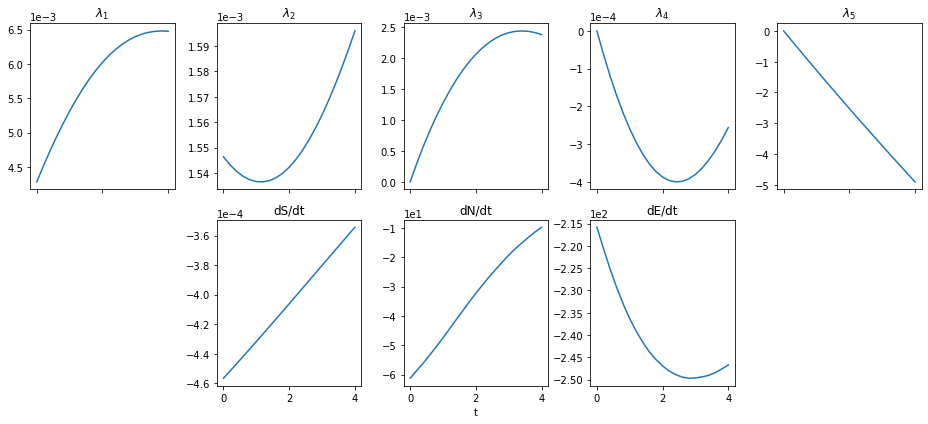

In [30]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first slot in the second row
    if i==5:
        ax.axis('off')
    # Set up legend for highest i
    # No legend needed if we are only plotting flexible functions.
    elif i==9:
#        ld_label = ax.plot(np.linspace(0,2),[np.nan]*50,c='tab:blue',label=r'Flexible functions')
#        ld_label = ax.plot(np.linspace(0,2),[np.nan]*50,c='tab:orange',label=r'Fixed functions')
#        ax.legend(loc='center left')
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # To plot (should be identical)
        ax.plot(np.linspace(0,4,num=21),l[:,i],c='tab:blue',label=r'Flexible functions')
#        ax.plot(np.linspace(0,0.5,num=6),lf[:,i],c='tab:orange',label=r'Fixed functions')
    else:
        dx = ds.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Should be identical
        ax.plot(np.linspace(0,4,num=21),ds[dx],c='tab:blue',label=r'Flexible functions')
#        ax.plot(np.linspace(0,0.5,num=6),dsf[dx],c='tab:orange',label=r'Fixed functions')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('flex_functions.pdf')

# Perturbation to $w_{10}$

In [4]:
# Perturb 2
perturb2 = p.copy()
perturb2['w10'] = 0.65

In [5]:
# Do the iteration with this disturbance
l2,s2,ds2 = ld.iterate(20,s_i,perturb2,dt=0.2)

Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20


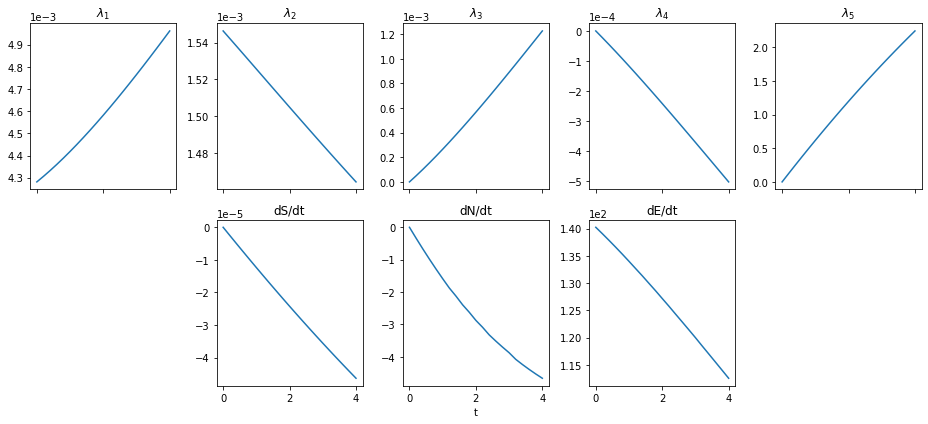

In [11]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first or final slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # To plot (should be identical)
        ax.plot(np.linspace(0,4,num=21),l2[:,i],c='tab:blue',label=r'Flexible functions')
    else:
        dx = ds2.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Should be identical
        ax.plot(np.linspace(0,4,num=21),ds2[dx],c='tab:blue',label=r'Flexible functions')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('flex_functions_w10.pdf')

# Perturbation to $w_0$

In [9]:
# Perturb 3
perturb3 = p.copy()
perturb3['w0'] = 0.95

In [15]:
# Do the iteration with this disturbance for longer
l3,s3,ds3 = ld.iterate(50,s_i,perturb3,dt=0.2)

Iteration 1/50
Iteration 2/50
Iteration 3/50
Iteration 4/50
Iteration 5/50
Iteration 6/50
Iteration 7/50
Iteration 8/50
Iteration 9/50
Iteration 10/50
Iteration 11/50
Iteration 12/50
Iteration 13/50
Iteration 14/50
Iteration 15/50
Iteration 16/50
Iteration 17/50
Iteration 18/50
Iteration 19/50
Iteration 20/50
Iteration 21/50
Iteration 22/50
Iteration 23/50
Iteration 24/50
Iteration 25/50
Iteration 26/50
Iteration 27/50
Iteration 28/50
Iteration 29/50
Iteration 30/50
Iteration 31/50
Iteration 32/50
Iteration 33/50
Iteration 34/50
Iteration 35/50
Iteration 36/50
Iteration 37/50
Iteration 38/50
Iteration 39/50
Iteration 40/50
Iteration 41/50
Iteration 42/50
Iteration 43/50
Iteration 44/50
Iteration 45/50
Iteration 46/50
Iteration 47/50
Iteration 48/50
Iteration 49/50
Iteration 50/50


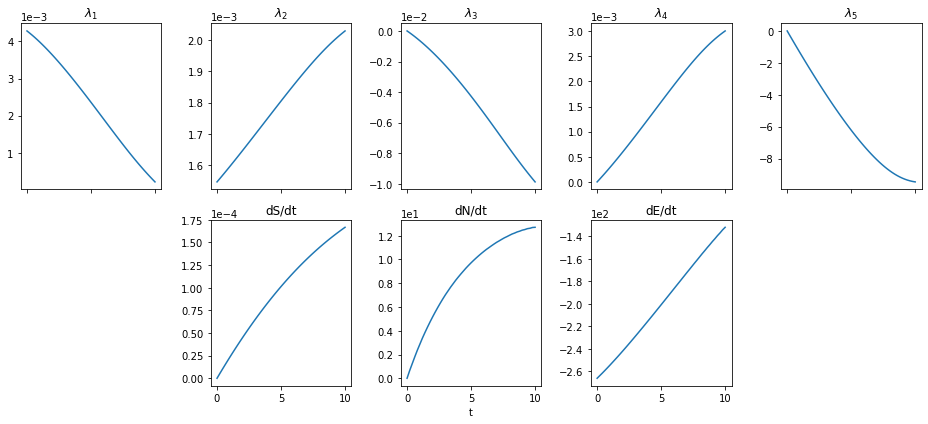

In [16]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first or final slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # To plot (should be identical)
        ax.plot(np.linspace(0,10,num=51),l3[:,i],c='tab:blue',label=r'Flexible functions')
    else:
        dx = ds3.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Should be identical
        ax.plot(np.linspace(0,10,num=51),ds3[dx],c='tab:blue',label=r'Flexible functions')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('flex_functions_w0.pdf')

# With w10 replaced by w1
This part of the code was tested when the log(1/b) part of w10 was commented out.

In [3]:
# Perturb 3
perturb3 = p.copy()
perturb3['w0'] = 0.95

In [4]:
# Do the iteration with this disturbance for longer
l3,s3,ds3 = ld.iterate(50,s_i,perturb3,dt=0.2)

Iteration 1/50
Iteration 2/50
Iteration 3/50
Iteration 4/50
Iteration 5/50
Iteration 6/50
Iteration 7/50
Iteration 8/50
Iteration 9/50
Iteration 10/50
Iteration 11/50
Iteration 12/50
Iteration 13/50
Iteration 14/50
Iteration 15/50
Iteration 16/50
Iteration 17/50
Iteration 18/50
Iteration 19/50
Iteration 20/50
Iteration 21/50
Iteration 22/50
Iteration 23/50
Iteration 24/50
Iteration 25/50
Iteration 26/50
Iteration 27/50
Iteration 28/50
Iteration 29/50
Iteration 30/50
Iteration 31/50
Iteration 32/50
Iteration 33/50
Iteration 34/50
Iteration 35/50
Iteration 36/50
Iteration 37/50
Iteration 38/50
Iteration 39/50
Iteration 40/50
Iteration 41/50
Iteration 42/50
Iteration 43/50
Iteration 44/50
Iteration 45/50
Iteration 46/50
Iteration 47/50
Iteration 48/50
Iteration 49/50
Iteration 50/50


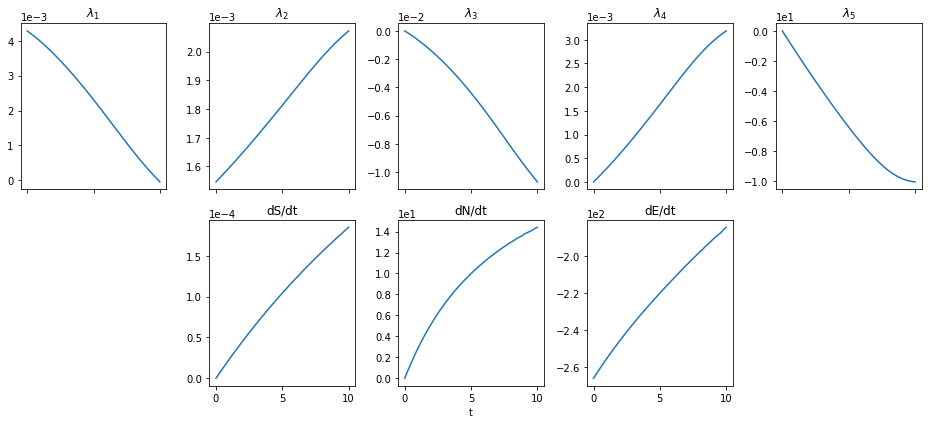

In [5]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first or final slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # To plot (should be identical)
        ax.plot(np.linspace(0,10,num=51),l3[:,i],c='tab:blue',label=r'Flexible functions')
    else:
        dx = ds3.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Should be identical
        ax.plot(np.linspace(0,10,num=51),ds3[dx],c='tab:blue',label=r'Flexible functions')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('flex_functions_w0_w1const.pdf')

# Doesn't seem to appear just because of constant, so that's nice.

In [14]:
# What about if I use the exact state and params from before?
# state variables
s = pd.Series(np.array([160,3000,2.5*10**5]), index=['S','N','E'])

# parameters. The precise ones are derived in the Speed with increasing size python notebook.
p_d = np.array([0.2,0.003,160,1.,0.15,0.95*s['E'],0.055])
p = pd.Series(p_d,index=['b0','d0','m0','w0','w10','Ec','mu'])

In [20]:
# Steady state?
l_ss,s_ss,ds_ss = ld.iterate(100,s,p)

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

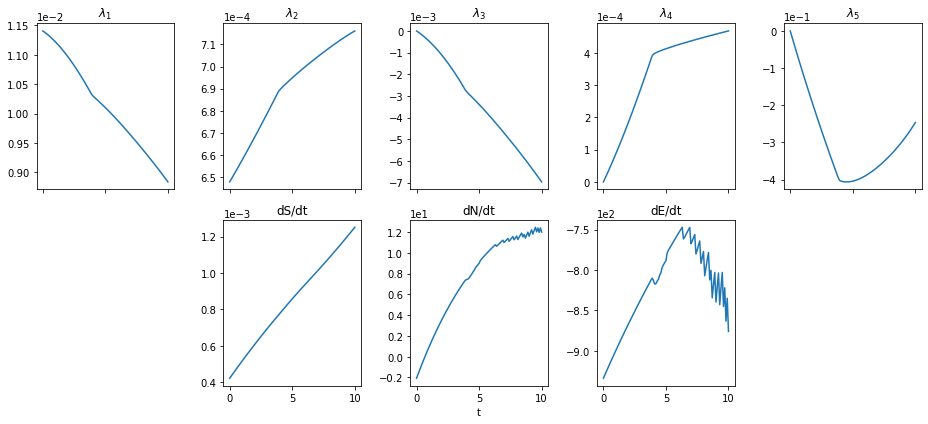

In [23]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first or final slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # To plot (should be identical)
        ax.plot(np.linspace(0,10,num=101),l_ss[:,i],c='tab:blue',label=r'Flexible functions')
    else:
        dx = ds_ss.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Should be identical
        ax.plot(np.linspace(0,10,num=101),ds_ss[dx],c='tab:blue',label=r'Flexible functions')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save

# This exact one does recover the jaggyness, so that's nice.

In [8]:
# With exact parameters rather than approximate ones
p_exact = ld.get_ss_params(s,p)
display(p_exact)

b0          0.200000
d0          0.003000
m0        162.086720
w0          1.000000
w10         0.146272
Ec     237500.000000
mu          0.055279
dtype: float64

In [9]:
perturbt = p_exact.copy()
perturbt['w0'] = 0.95

In [11]:
# Do the iteration with smaller dt
l31,s31,ds31 = ld.iterate(100,s,perturbt,dt=0.1)

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

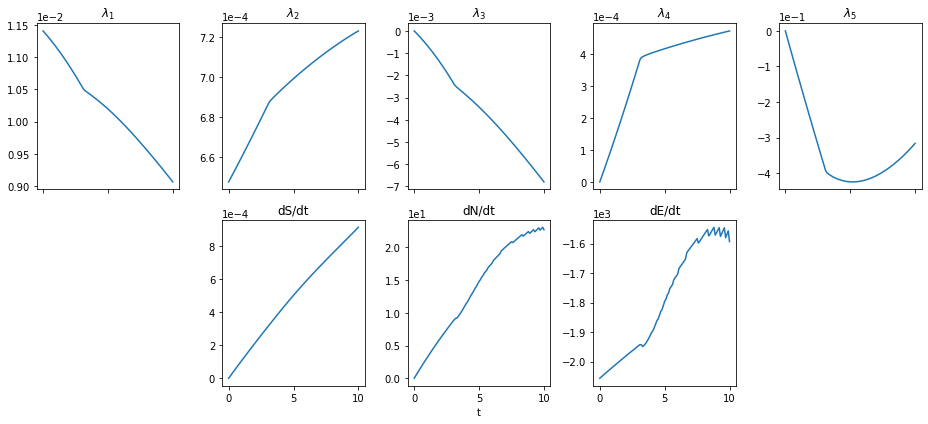

In [13]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first or final slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # To plot (should be identical)
        ax.plot(np.linspace(0,10,num=101),l31[:,i],c='tab:blue',label=r'Flexible functions')
    else:
        dx = ds31.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Should be identical
        ax.plot(np.linspace(0,10,num=101),ds31[dx],c='tab:blue',label=r'Flexible functions')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
#fig.savefig('flex_functions_w0_w1const_dt01.pdf')

# Weirdly here, no jaggyness again! Not really sure why.

In [5]:
# Numbers from Nina to check if I recover jaggedness. These are as above, I just wanted to check
s = pd.Series(np.array([160,3000,2.5*10**5]), index=['S','N','E'])
# Parameters 
p_d = np.array([0.2,0.003,160,1.,0.15,0.95*s['E'],0.055])
p = pd.Series(p_d,index=['b0','d0','m0','w0','w10','Ec','mu'])
# With exact parameters rather than approximate ones
p_exact = ld.get_ss_params(s,p)
display(p_exact)
#perturbation
perturb_w0 = p_exact.copy() 
perturb_w0['w0'] = 0.95

# From nina
'''
b0         0.200000
d0         0.003000
m0       162.086720
w0         1.000000
w1         0.146272
Ec    237500.000000
mu         0.055279
'''

b0          0.200000
d0          0.003000
m0        162.086720
w0          1.000000
w10         0.146272
Ec     237500.000000
mu          0.055279
dtype: float64